In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [12]:
# 1. LOAD THE DATA
df = pd.read_csv("../datasets/ACDC_radiomics.csv")

In [13]:

# 2. PREPROCESSING
# Separate out the features and target. Assume the 'class' column holds the ground truth labels.
X = df.drop(columns=["class"])
y = df["class"]

# Scale the data – K-Means is sensitive to scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [18]:
# 4. Choose the number of clusters (k)
# Since we know there are 5 pathologies, let's set k = 5. 
k = 5

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [19]:
# 5. Evaluate clustering (optional, for comparison with true labels)
# Adjusted Rand Index (ARI) measures how well the cluster assignments agree with the ground truth
ari = adjusted_rand_score(y, cluster_labels)
print(f"Adjusted Rand Index (ARI) for k={k}: {ari:.3f}")

# Silhouette score measures cluster cohesion and separation
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for k={k}: {sil_score:.3f}")

Adjusted Rand Index (ARI) for k=5: 0.031
Silhouette Score for k=5: 0.229


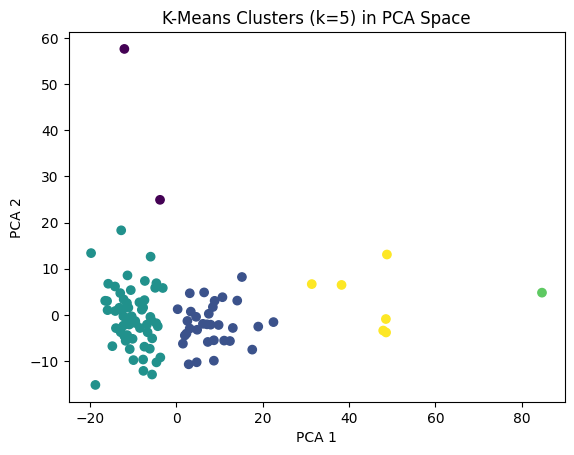

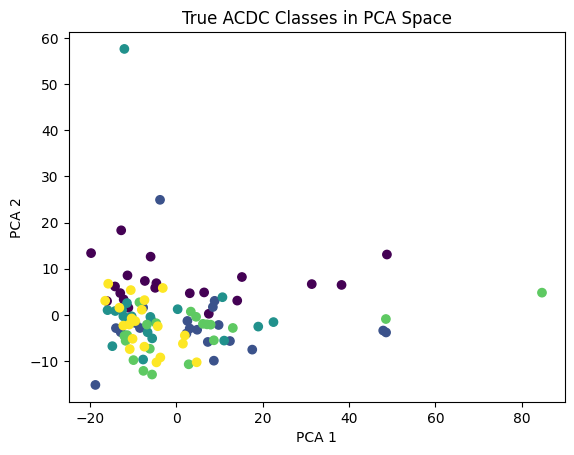

In [20]:
# 6. Visualization in 2D with PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# (a) Plot the K-Means cluster assignments in the PCA-reduced space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
plt.title("K-Means Clusters (k=5) in PCA Space")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# (b) Plot the true class labels in the PCA-reduced space
# If labels are strings, convert them to numeric codes:
y_numeric = pd.Categorical(y).codes

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric)
plt.title("True ACDC Classes in PCA Space")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()